In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
path_revision = 'Revision'

In [3]:
def get_table(base_path, report_name, entry):
    table = pd.read_csv(base_path + '/Sequential/' + report_name + '.txt')
    
    for i in range(1,5):
        index = pow(2,i)
        table[str(index)] = pd.read_csv(base_path + '/OpenMP/' + str(index) + '/' + report_name + '.txt')[entry]
    
    table['TBB'] = pd.read_csv(base_path + '/TBB/' + report_name + '.txt')[entry]
    return table.to_numpy()

In [4]:
def get_tables_openmp(base_path, report_name):
    res = []

    for i in range(1,5):
        index = pow(2, i)
        res.append(pd.read_csv(base_path + '/OpenMP/' + str(index) + '/' + report_name + '.txt').to_numpy())
    
    return res

In [5]:
def get_tables_TBB(base_path, report_name):
    return pd.read_csv(base_path + '/TBB/' + report_name + '.txt').to_numpy() 

In [6]:
def get_table_sequential(base_path, report_name):
    return pd.read_csv(base_path + '/Sequential/' + report_name + '.txt').to_numpy() 

In [7]:
def create_row(seq, open, idx, idy):
    tmp_row = [seq[idx, idy]]

    for i in range(4):
        tmp_row.append(open[i][idx, idy])
    
    return tmp_row

In [8]:
tbb_revision = get_tables_TBB(path_revision, 'report_Constrained_Builder')
openMP_revision = get_tables_openmp(path_revision, 'report_Constrained_Builder')
sequential_revision = get_table_sequential(path_revision, 'report_Constrained_Builder')

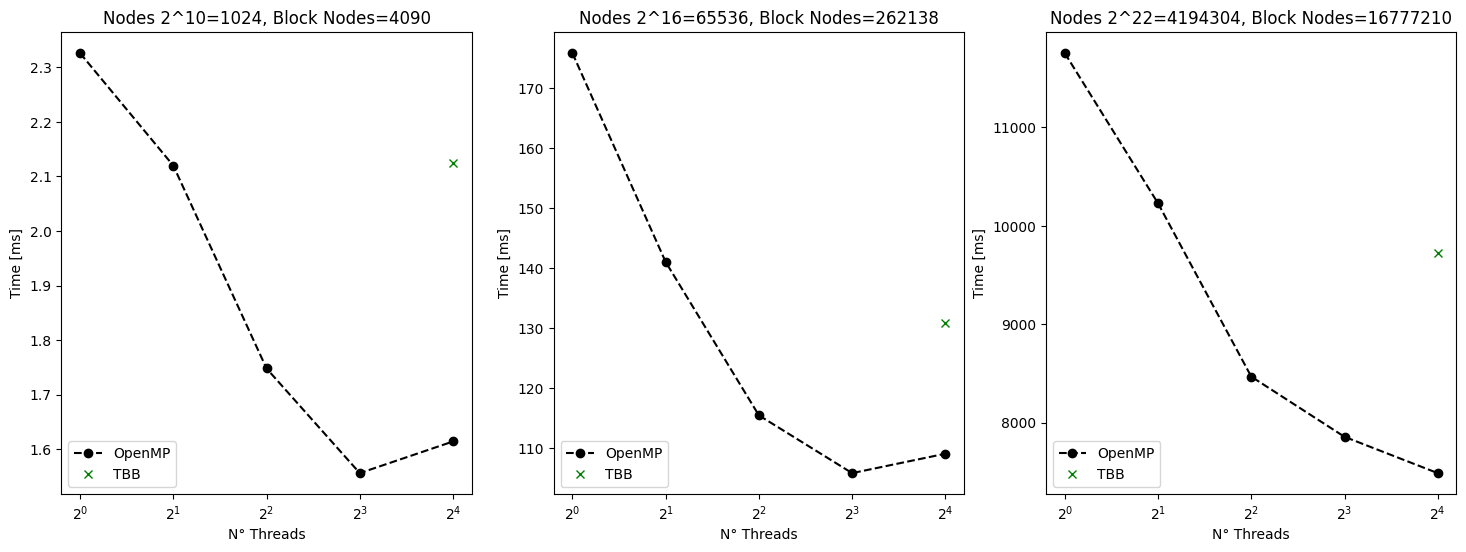

In [9]:
fix, axs = plt.subplots(1, 3, figsize=(18, 6))

for i, ax in enumerate(axs.flat):
    ax.set_title('Nodes 2^' + str(int(math.log2(sequential_revision[i*6,0]))) + '=' + str(int(sequential_revision[i*6,0])) + ', Block Nodes=' + str(int((sequential_revision[i*6,0]-2)*4+2)))

    
    ax.plot([1,2,4,8,16], create_row(sequential_revision, openMP_revision, i*6, 1), '--ko')
    ax.plot(16, tbb_revision[i*6, 1], 'gx')

    ax.set_xlabel('N° Threads')
    ax.set_ylabel('Time [ms]')


    ax.set_xscale('log', base=2)
    ax.legend(['OpenMP', 'TBB'], loc='lower left')

In [13]:
print('Num Nodes,Block Nodes,Sequential [ms],2 [%],4 [%],8 [%],16 [%],TBB [%]')

for i in range(0, 13):
    final_str = str(int(sequential_revision[i,0])) + ',' + str(int((sequential_revision[i,0]-2)*4+2)) + ',' + str(round(sequential_revision[i, 1] * 100) / 100)

    for j in range(4):
        final_str = final_str + ',' + str(round((sequential_revision[i, 1] - openMP_revision[j][i, 1]) / sequential_revision[i, 1] * 100 * 100) / 100)
    final_str = final_str + ',' + str(round((sequential_revision[i, 1] - tbb_revision[i, 1]) / sequential_revision[i, 1] * 100 * 100) / 100)

    print(final_str)

Num Nodes,Block Nodes,Sequential [ms],2 [%],4 [%],8 [%],16 [%],TBB [%]
1024,4090,2.33,8.87,24.85,33.1,30.6,8.69
2048,8186,4.99,18.71,31.78,34.29,25.17,22.14
4096,16378,9.28,12.17,26.68,31.69,20.53,17.97
8192,32762,19.52,14.36,28.2,33.85,26.96,18.28
16384,65530,42.56,17.69,30.66,36.06,33.22,21.94
32768,131066,84.8,16.84,30.93,33.67,34.87,22.8
65536,262138,175.82,19.8,34.34,39.81,37.97,25.6
131072,524282,383.18,21.56,36.67,38.63,38.37,12.98
262144,1048570,749.98,15.06,29.71,34.66,36.15,18.21
524288,2097146,1513.73,16.99,30.51,35.36,37.34,20.16
1048576,4194298,3083.04,19.05,31.88,36.93,39.0,21.4
2097152,8388602,6026.76,17.13,31.71,35.87,37.22,20.11
4194304,16777210,11755.8,12.99,27.98,33.19,36.33,17.26


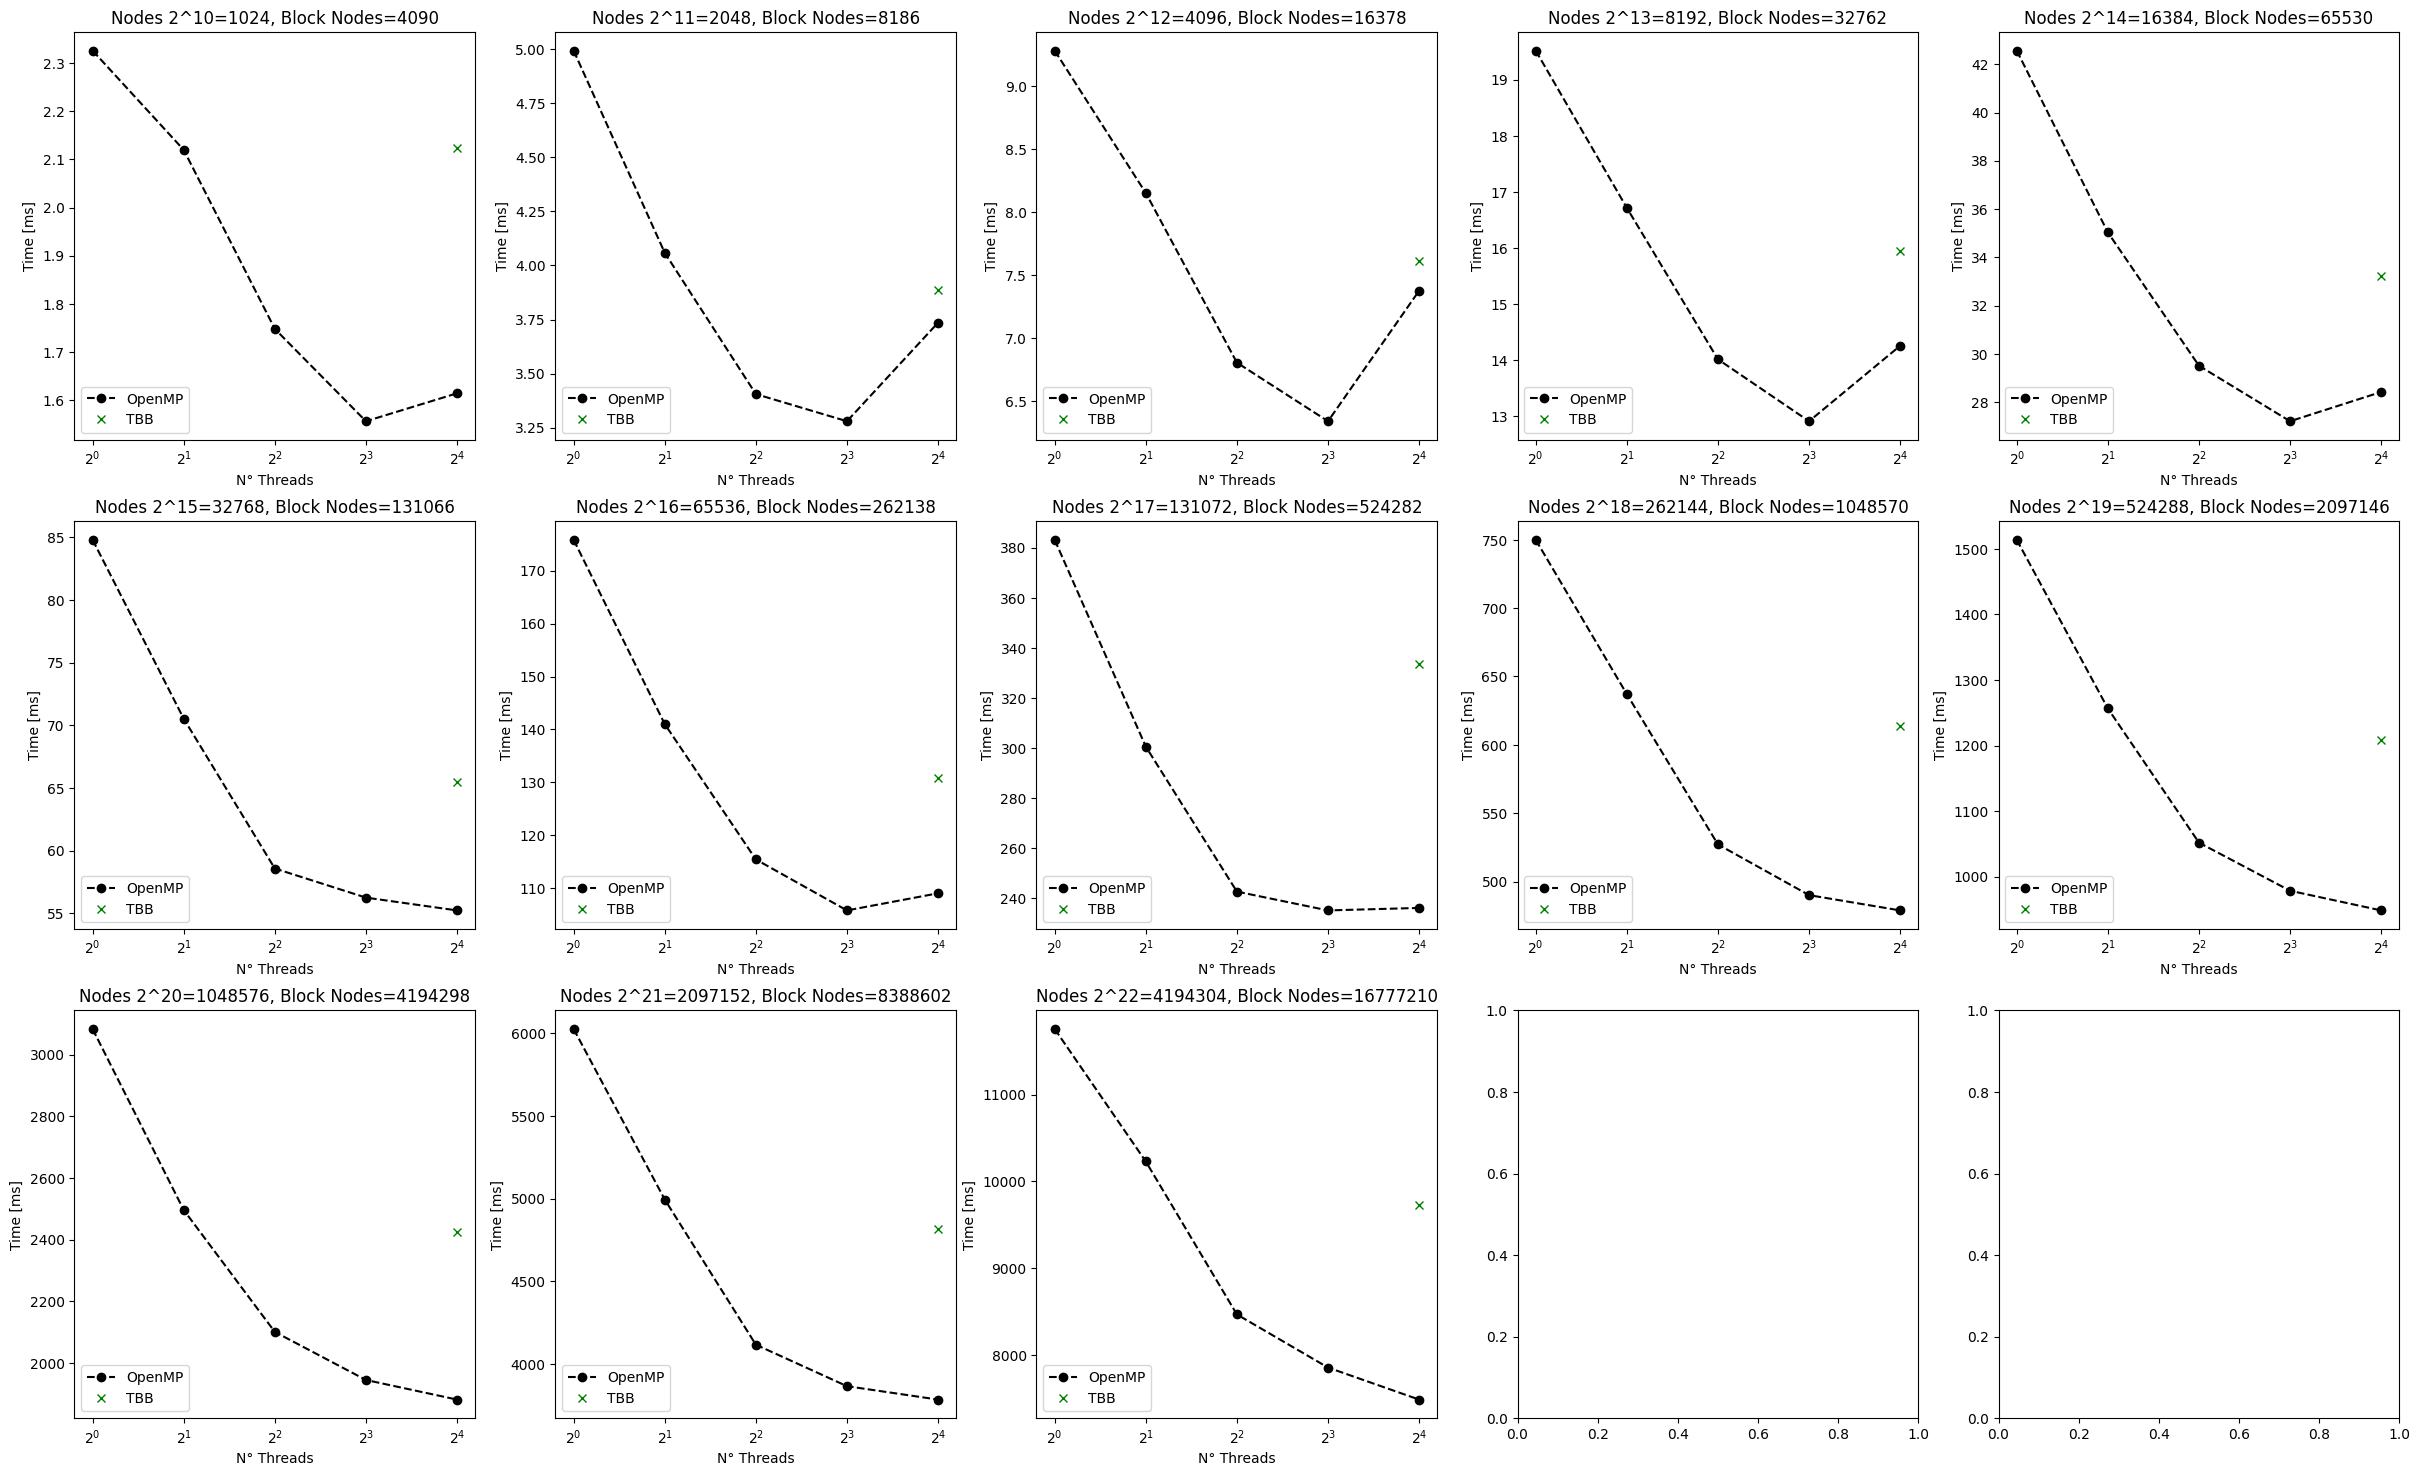

In [11]:
fix, axs = plt.subplots(3, 5, figsize=(30, 18))

for i, ax in enumerate(axs.flat):
    ax.set_title('Nodes 2^' + str(int(math.log2(sequential_revision[i,0]))) + '=' + str(int(sequential_revision[i,0])) + ', Block Nodes=' + str(int((sequential_revision[i,0]-2)*4+2)))

    
    ax.plot([1,2,4,8,16], create_row(sequential_revision, openMP_revision, i, 1), '--ko')
    ax.plot(16, tbb_revision[i, 1], 'gx')

    ax.set_xlabel('N° Threads')
    ax.set_ylabel('Time [ms]')


    ax.set_xscale('log', base=2)
    ax.legend(['OpenMP', 'TBB'], loc='lower left')

    if i == 12:
        break